In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tifffile import imsave
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from os import listdir, rename
from os.path import isfile, join
import os

Using TensorFlow backend.


In [3]:
mypath = '../Images/Chemical/20585/'
file_pre = '04'
samplenum = 1

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = pd.Series(onlyfiles)
count = 0
for idx in range(1,6):
    str_true = file_pre+'_s{}_w{}'.format(samplenum,idx)
        
    file_true = pd.Series([file_str.find(str_true) for file_str in onlyfiles])
    file_true = file_true >= 0
        
    if len(onlyfiles[file_true]) == 0:
        0
    else: 
        count += 1
        filename = mypath + str(onlyfiles[file_true].values[0])
        im = Image.open(filename)
        im_temp = np.array(im)
        if count == 1:
            im_array = np.zeros((im_temp.shape[0], im_temp.shape[1], 5))
        im_array[:,:, idx-1] = np.array(im)

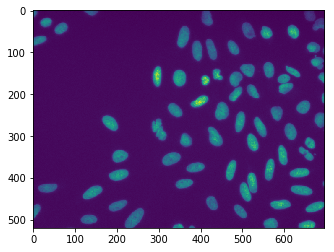

In [4]:
plt.imshow(im_array[:,:,0])

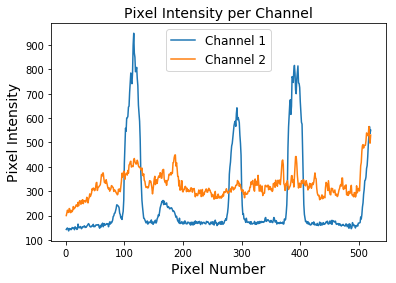

In [56]:
nuc_pixel = im_array[:,100,0]
pixel_num = range(1,1+len(nuc_pixel))

ac_pixel = im_array[:,100,1]
pixel_num = range(1,1+len(ac_pixel))

plt.plot(pixel_num, nuc_pixel)
plt.plot(pixel_num, ac_pixel)
plt.title('Pixel Intensity per Channel', fontsize = 14)
plt.xlabel('Pixel Number', fontsize = 14)
plt.ylabel('Pixel Intensity', fontsize = 14)

plt.legend(['Channel 1', 'Channel 2'], fontsize = 12)
plt.savefig('../Documents/ImagePreprocessing_Images/Pixel_Intensity.png', bbox_inches = 'tight')
plt.show()

In [72]:
from sklearn.decomposition import PCA

dirname = '../Images/train/class0/'

onlyfiles = [f for f in listdir(dirname) if isfile(join(dirname, f))]
onlyfiles = pd.Series(onlyfiles)
for idx in range(1,37):
    filename = 'class04_'+str(idx)+'_comb.tif'

    file_true = pd.Series([file_str.find(filename) for file_str in onlyfiles])
    file_true = file_true >= 0
    filename = dirname + str(onlyfiles[file_true].values[0])
    
    im = Image.open(filename)
    im_temp = np.array(im)
    
    if idx == 1:
        X = np.zeros((36, im_temp.shape[0]*im_temp.shape[1]))
    
    X[idx-1,:] = im_temp.flatten()



In [81]:
n_components = 6
pca = PCA(n_components = n_components)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

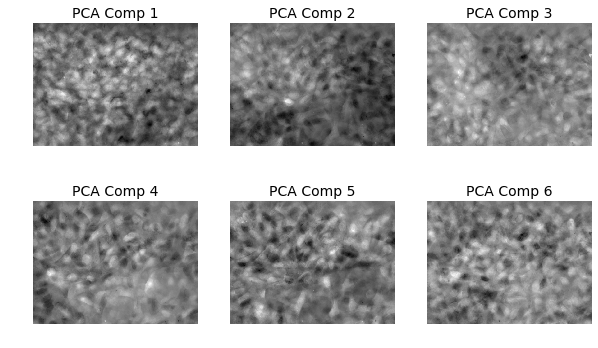

In [88]:
#image pca components

plt.figure(figsize =(10,6))
for idx in range(n_components):
    temp = pca.components_[idx,:]
    
    pca_im = temp.reshape(im_temp.shape[0], im_temp.shape[1])
    
    plt.subplot(230 + 1 + idx)
    plt.title('PCA Comp {}'.format(idx + 1), fontsize = 14)
    plt.axis('off')
    plt.imshow(pca_im, cmap = 'gray')

plt.savefig('../Documents/ImagePreprocessing_Images/PCA_Images.png', bbox_inches = 'tight')
plt.show()

In [30]:
from scipy.misc import imresize, toimage
#im_array = im_array.sum(axis = 2)/im_array.sum(axis= 2).max().max()*10000
im2 = im_array.mean(axis = 2)

samples = np.expand_dims(im_array, 0)
samples = np.expand_dims(samples, 3)
samples = toimage(im2)
samples2 = imresize(samples, (256, 256))
samples2 = np.array(samples2).astype('int')
#samples2 = np.expand_dims(samples2, 0)
#samples2 = np.expand_dims(samples2, 3)

sample3 = pd.DataFrame(samples2)
print(sample3.isna().sum().sum())
datagen = ImageDataGenerator(rescale = 1./255,\
                             zoom_range = [0.5, 1.0])#,\
                             #rotation_range = 90,\
                             #horizontal_flip = True,\
                             #vertical_flip = True,\
                             #brightness_range = [0.2, 1.0])
                             #height_shift_range = 0.5,\
                             #width_shift_range= [-200, 200])
                            #zoom_range = [0.5, 1.0])
#it = datagen.flow(im_array, batch_size = 1)
it = datagen.flow_from_directory(samples2)

plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    
    image = batch[0]
    image = np.squeeze(image)
    
    plt.imshow(image, cmap = 'gray')
    plt.axis('off')
    
plt.tight_layout(h_pad = 0, w_pad = 0)
#plt.savefig('../Documents/Images_modeling/Augment_zoom.png', bbox_inches = 'tight')
plt.show()

0


C:\Users\jjjon\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys
C:\Users\jjjon\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


ValueError: listdir: embedded null character in path

In [116]:
batch = it.next()
batch[1]

array([[1., 0.]], dtype=float32)